<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 2: *Statistics & Data Visualization***

### **Tenggat Waktu: 16 September 2023, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab2_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 September 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Valencius Apriady Primayudha"
KELAS = "D"
NPM = "2106750830"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Valencius Apriady Primayudha dari kelas D dengan NPM 2106750830, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Valencius Apriady Primayudha)


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) adalah suatu proses dalam melakukan analisis terhadap dataset dengan tujuan untuk melihat karakteristik utama dari data tersebut. EDA merupakan pemrosesan dasar yang hasilnya dapat mempengaruhi keputusan-keputusan yang diambil oleh seorang data scientist dalam melakukan pemrosesan data di tahap selanjutnya. Pada proses ini sering melibatkan dua hal yang akan kita pelajari pada Lab kali ini, yaitu *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Smartphone Specification

Dataset yang digunakan pada Lab kali ini merepresentasikan data spesifikasi dari *smartphone* yang beredar pada pasar saat ini. Berikut merupakan deskripsi dari setiap kolom yang ada pada dataset tersebut

* `Brand` : Nama Merk/Brand *smartphone*
* `Phone` : Nama Tipe/Model *smartphone*
* `Price` : Harga *smartphone*
* `Screensize (inches)` : Ukuran layar *smartphone* dalam satuan inci
* `Camera_Nos` : Jumlah kamera belakang pada *smartphone*
* `Front Camera (MP)` : Besar Megapixel kamera depan *smartphone*
* `Rear Camera (MP)` :  Besar Megapixel kamera belakang *smartphone*
* `Memory (GB)` : Besar penyimpanan dalam Gigabyte
* `RAM (GB)` : Besar RAM dalam Gigabyte
* `Battery (mAh)` : Besar baterai Smartphone
* `Rating` : Penilaian produk smartphone tersebut

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [4]:
df = pd.read_csv('SmartphoneSpecs.csv')

In [5]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 910
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


In [6]:
# Menghitung jumlah data missing value per atribut
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                     Total   Percent
Memory (GB)             29  0.031868
RAM (GB)                23  0.025275
Screensize (inches)     12  0.013187
Battery (mAh)            9  0.009890
Front Camera (MP)        8  0.008791
Rear Camera (MP)         3  0.003297


Karena terdapat missing value pada data tersebut dengan jumlah yang relatif kecil dengan nilai terbesar 0.032% saja. Maka dari itu, untuk saat ini kita akan menghapus baris data yang memiliki missing value tersebut. Untuk proses *pre-processing data* akan kalian pelajari secara lebih lanjut pada Lab selanjutnya.

In [7]:
# Hapus baris yang memiliki missing value
df.dropna(inplace=True)

In [8]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 848
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


Dapat terlihat bahwa jumlah data telah berkurang dari yang sebelumnya berjumlah 910 data menjadi 848 data. Data yang dikurangi tersebut merupakan data yang memiliki missing value. Maka dari itu, tidak ada lagi data yang memiliki missing value yang dapat terlihat pada hasil perintah berikut

Pada Pandas, terdapat metode `.info()` yang berguna untuk mendapatkan ringkasan informasi dari DataFrame, termasuk nama-nama kolom, jumlah data yang tidak null (non-null), dan tipe data untuk setiap kolom. Penggunaan metode ini membantu kita dengan cepat memahami struktur DataFrame yang sedang kita kerjakan.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 0 to 909
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                848 non-null    object 
 1   Phone                848 non-null    object 
 2   Price                848 non-null    int64  
 3   Screensize (inches)  848 non-null    float64
 4   Camera_Nos           848 non-null    int64  
 5   Front Camera (MP)    848 non-null    float64
 6   Rear Camera (MP)     848 non-null    float64
 7   Memory (GB)          848 non-null    float64
 8   RAM (GB)             848 non-null    float64
 9   Battery (mAh)        848 non-null    float64
 10  Rating               848 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 79.5+ KB


Selain itu, terdapat juga metode .describe() yang berguna untuk menghasilkan statistik deskriptif dari suatu DataFrame. Melalui metode ini, kita bisa memperoleh ringkasan statistik yang cukup menggambarkan terkait central tendency, persebaran data, dan bentuk distribusi dari kumpulan data tersebut.

In [10]:
df.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,22500.871462,6.045649,2.301887,13.798349,25.679245,92.830189,4.752358,3888.193396,1.396226
std,20643.214336,0.606627,1.116960,9.044017,21.453267,87.672189,2.477048,938.662621,0.611642
min,905.000000,2.450000,1.000000,1.200000,5.000000,8.000000,1.000000,950.000000,1.000000
25%,9598.500000,5.500000,1.000000,8.000000,12.000000,32.000000,3.000000,3100.000000,1.000000
50%,14999.000000,6.260000,2.000000,12.000000,13.000000,64.000000,4.000000,4000.000000,1.000000
75%,27992.250000,6.500000,3.000000,16.000000,48.000000,128.000000,6.000000,4500.000000,2.000000
max,173999.000000,7.600000,5.000000,48.000000,108.000000,512.000000,12.000000,7000.000000,3.000000


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mari kita mengingat kembali materi yang terdapat pada Mata Kuliah StatProb, diantaranya sebagai berikut:
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara `median` lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Screensize (inches)`:

In [11]:
screensize_arr = df['Screensize (inches)']

stats = [
    ['Mean', np.mean(screensize_arr)],
    ['Median', np.median(screensize_arr)],
    ['Mode', scp.mode(screensize_arr)[0]],
    ['Standard Deviation', np.std(screensize_arr)],
    ['Variance', np.var(screensize_arr)],
    ['Minimum', np.min(screensize_arr)],
    ['Maximum', np.max(screensize_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,6.045649
1,Median,6.260000
2,Mode,5.500000
3,Standard Deviation,0.606269
4,Variance,0.367562
5,Minimum,2.450000
6,Maximum,7.600000


Pada hasil di atas, bisa kita lihat bahwa nilai terbesar dimiliki oleh Mean dengan urutan sebagai berikut:
`median` > `mean` > `mode`

Data tersebar sebesar 0.61 dari nilai `mean`. dengan nilai maksimum 7.6 dan minimum 2.45. Kemungkinan data cenderung padat di nilai yang tinggi atau padat ke kanan.

C:\Users\Valencius Apriady\AppData\Local\Temp\ipykernel_22700\2712290349.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(screensize_arr, shade=True)
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


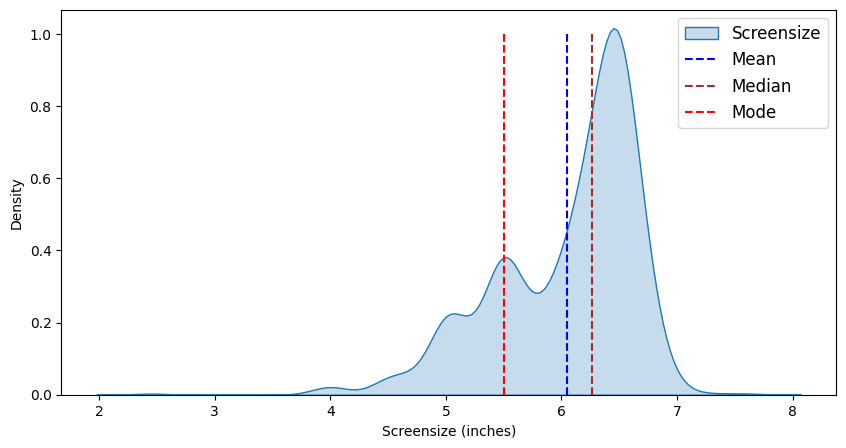

In [12]:
plt.figure(figsize=(10,5))
sns.kdeplot(screensize_arr, shade=True)
plt.vlines(x=np.mean(screensize_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(screensize_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(screensize_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Screensize', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `left skewed` karena distribusi data lebih berat di sebelah kanan dan memiliki ekor yang panjang di sebelah kiri. Dapat terlihat pula pada visualisasi data di atas, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data karena distribusi data bersifat left skewed.

Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan visualisasi overlapping KDE plot. Sebagai contoh jika kita ingin membandingkan distribusi Screen Size pada Xiaomi dan Samsung, berikut merupakan penerapan KDE plot-nya

C:\Users\Valencius Apriady\AppData\Local\Temp\ipykernel_22700\3491047464.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Valencius Apriady\AppData\Local\Temp\ipykernel_22700\3491047464.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

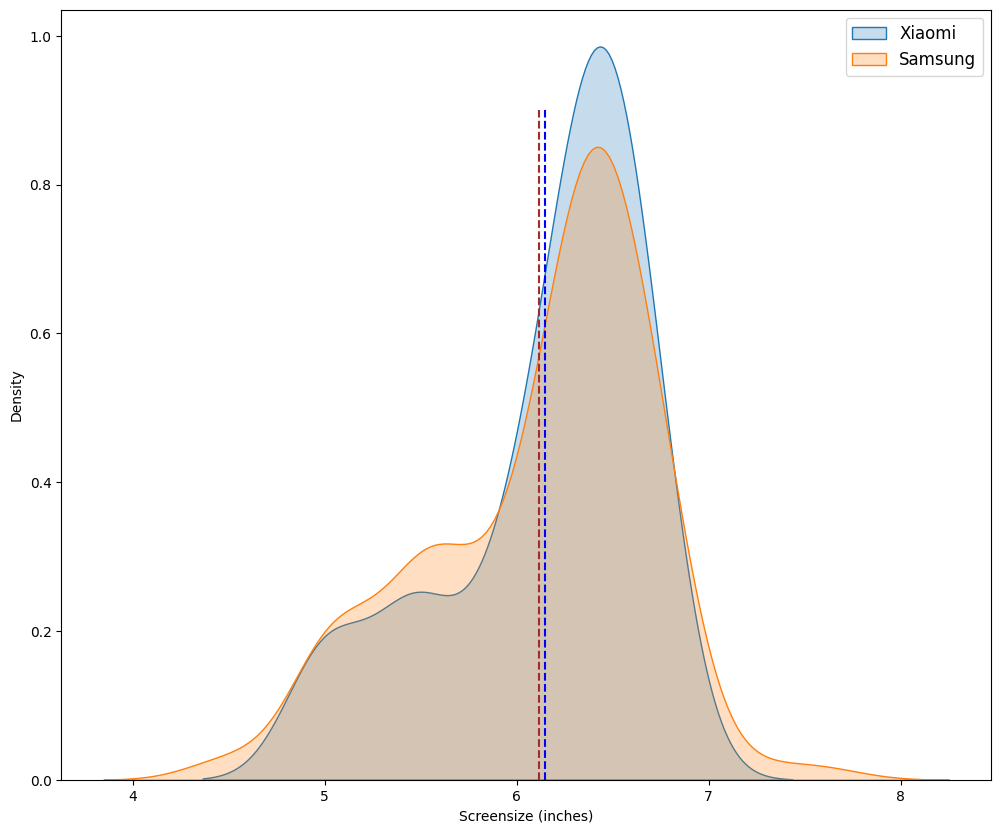

In [13]:
# KDE Plot
xiaomi = df[df['Brand'] == 'Xiaomi']
samsung = df[df['Brand'] == 'Samsung']
plt.figure(figsize=(12,10))
sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
sns.kdeplot(samsung['Screensize (inches)'], shade=True)
plt.legend(['Xiaomi','Samsung'], fontsize=12)
plt.vlines(x=xiaomi['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=samsung['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Korelasi dalam ranah *data science* merujuk pada hubungan statistik antara dua atau lebih variabel. Melalui korelasi, membantu kita memahami bagaimana perubahan dalam suatu variabel akan berkaitan dengan perubahan dalam variabel lainnya. Korelasi mengukur sejauh mana dua variabel bergerak bersamaan atau dependensi dalam suatu pola tertentu.

Dalam konteks korelasi, ada dua jenis korelasi yang umum digunakan:

* Korelasi Positif: Ketika dua variabel memiliki korelasi positif, artinya ketika satu variabel naik, yang lainnya juga cenderung naik, dan sebaliknya. Ini mengindikasikan adanya hubungan searah antara kedua variabel tersebut.

* Korelasi Negatif: Jika dua variabel memiliki korelasi negatif, artinya ketika satu variabel naik, yang lainnya cenderung turun, dan sebaliknya. Ini menunjukkan adanya hubungan terbalik atau lawan antara kedua variabel tersebut.

Korelasi dapat diukur dengan menggunakan koefisien korelasi, yang paling umum digunakan adalah dengan menghitung koefisien **korelasi Pearson**. Koefisien ini memiliki nilai antara -1 hingga 1:

* Nilai +1 menunjukkan korelasi positif sempurna, yaitu kedua variabel bergerak searah secara linier.
* Nilai -1 menunjukkan korelasi negatif sempurna, yaitu kedua variabel bergerak terbalik secara linier.
* Nilai 0 menunjukkan tidak ada korelasi linier antara kedua variabel tersebut.


Korelasi adalah alat penting dalam analisis data, karena membantu kita mengidentifikasi hubungan antara variabel, memprediksi perilaku data atau variabel, dan membuat keputusan yang lebih baik berdasarkan pemahaman tentang bagaimana variabel-variabel tersebut berkaitan antar satu sama lainnya. Namun, penting untuk diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, dan perlu berhati-hati dalam mengartikan hasil korelasi.



In [14]:
# Implementasi korelasi Pearson
df.select_dtypes(include=[np.number]).corr(method='pearson')

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
Price,1.000000,0.279743,0.255461,0.276826,0.260423,0.659269,0.591847,0.014406,0.184664
Screensize (inches),0.279743,1.000000,0.725854,0.508298,0.531006,0.427751,0.602524,0.733120,0.389417
Camera_Nos,0.255461,0.725854,1.000000,0.546458,0.669166,0.416711,0.589898,0.632693,0.467579
Front Camera (MP),0.276826,0.508298,0.546458,1.000000,0.620479,0.387675,0.622373,0.331991,0.372598
Rear Camera (MP),0.260423,0.531006,0.669166,0.620479,1.000000,0.369280,0.622262,0.481070,0.522019
Memory (GB),0.659269,0.427751,0.416711,0.387675,0.369280,1.000000,0.709825,0.198526,0.257357
RAM (GB),0.591847,0.602524,0.589898,0.622373,0.622262,0.709825,1.000000,0.383067,0.437329
Battery (mAh),0.014406,0.733120,0.632693,0.331991,0.481070,0.198526,0.383067,1.000000,0.346563
Rating,0.184664,0.389417,0.467579,0.372598,0.522019,0.257357,0.437329,0.346563,1.000000


Dari perhitungan korelasi Pearson di atas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi. Berdasarkan tabel di atas, pasangan atribut yang memiliki relasi yang tinggi adalah pasangan atribut `Camera_Nos` dengan `Screensize (inches)` dan `Rear Camera (MP)`. Untuk membuktikannya, di bawah ini terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Camera_Nos`, yaitu:
* `Screensize (inches)`: 0.73
* `Rear Camera (MP)`: 0.67

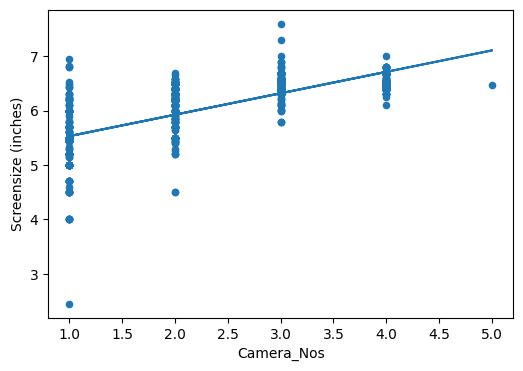

In [15]:
# Scatterplot Camera_Nos dan Screensize (inches)
w = df["Camera_Nos"]
z = df["Screensize (inches)"]
df.plot.scatter(x="Camera_Nos", y="Screensize (inches)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

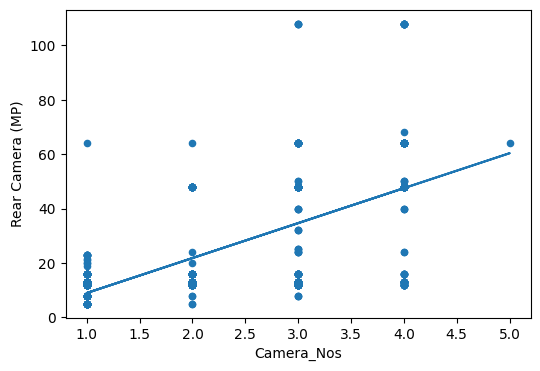

In [16]:
# Scatterplot Camera_Nos dan Rear Camera (MP)
w = df["Camera_Nos"]
z = df["Rear Camera (MP)"]
df.plot.scatter(x="Camera_Nos", y="Rear Camera (MP)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Brand'>

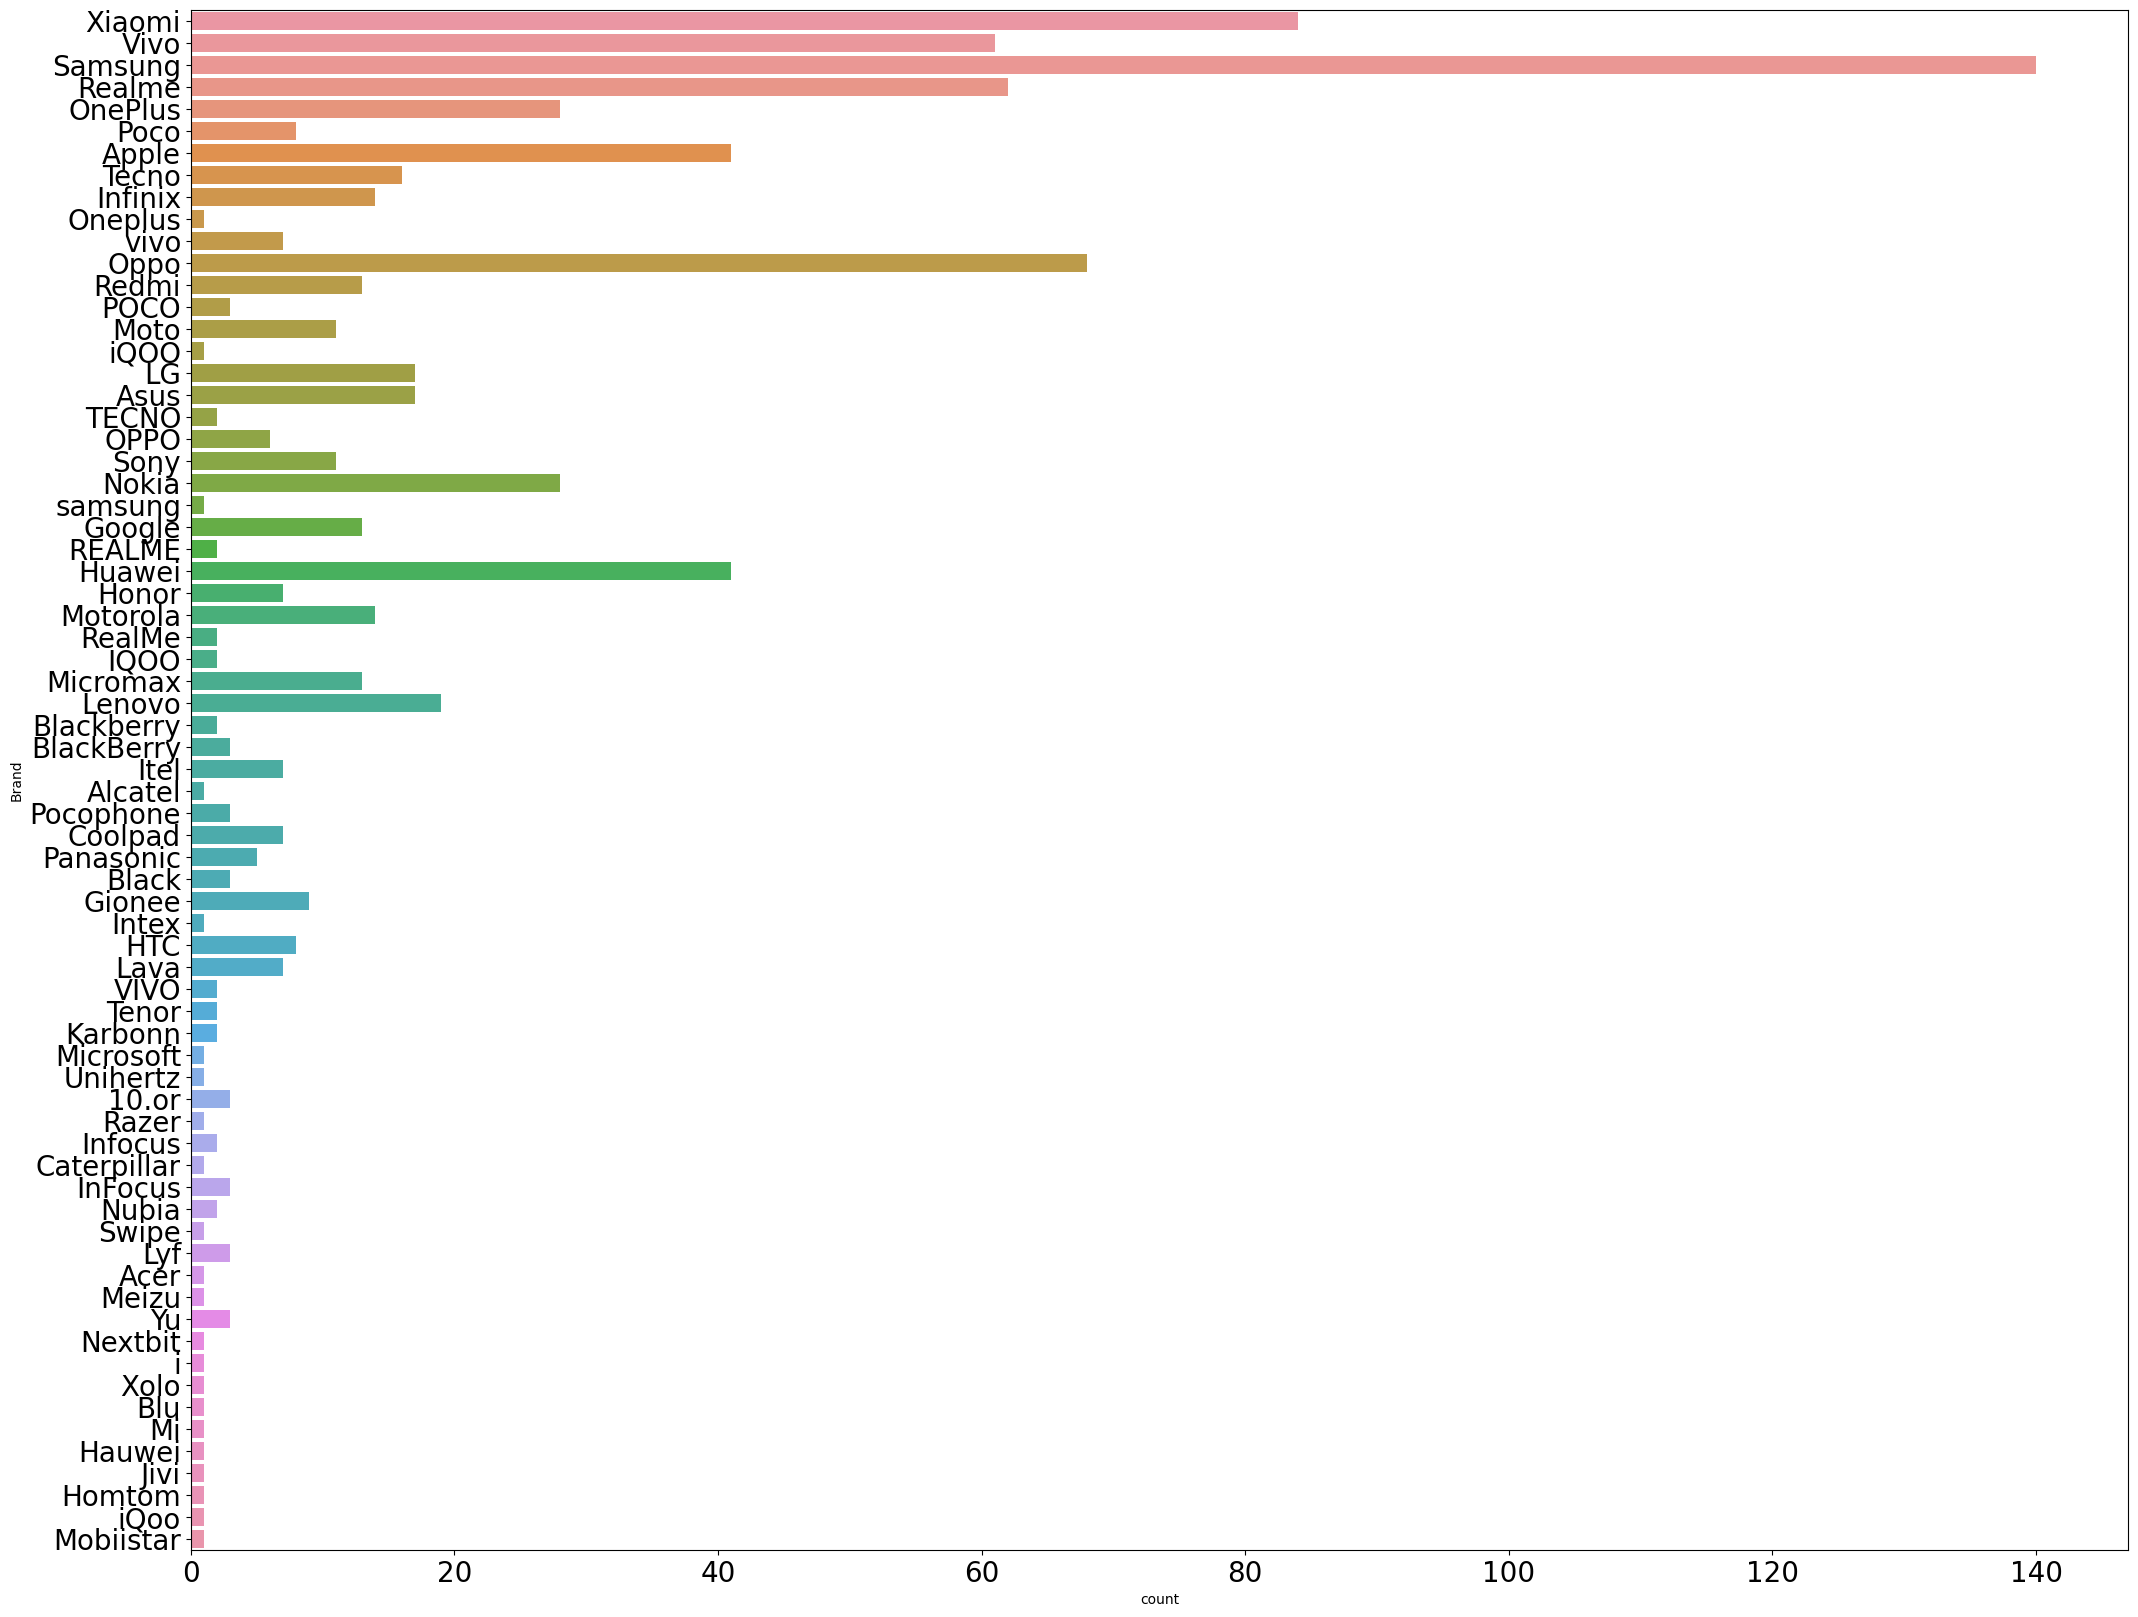

In [17]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='Brand', data=df)

Bisa kita lihat pada countplot di atas bahwa Samsung merupakan brand smartphone yang memiliki tipe terbanyak. Berikut merupakan contoh jika kita ingin mendapatkan visualisasi data yang telah diurutkan dari yang paling besar hingga terkecil berdasarkan nilai yang dimilikinya.

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Brand'>

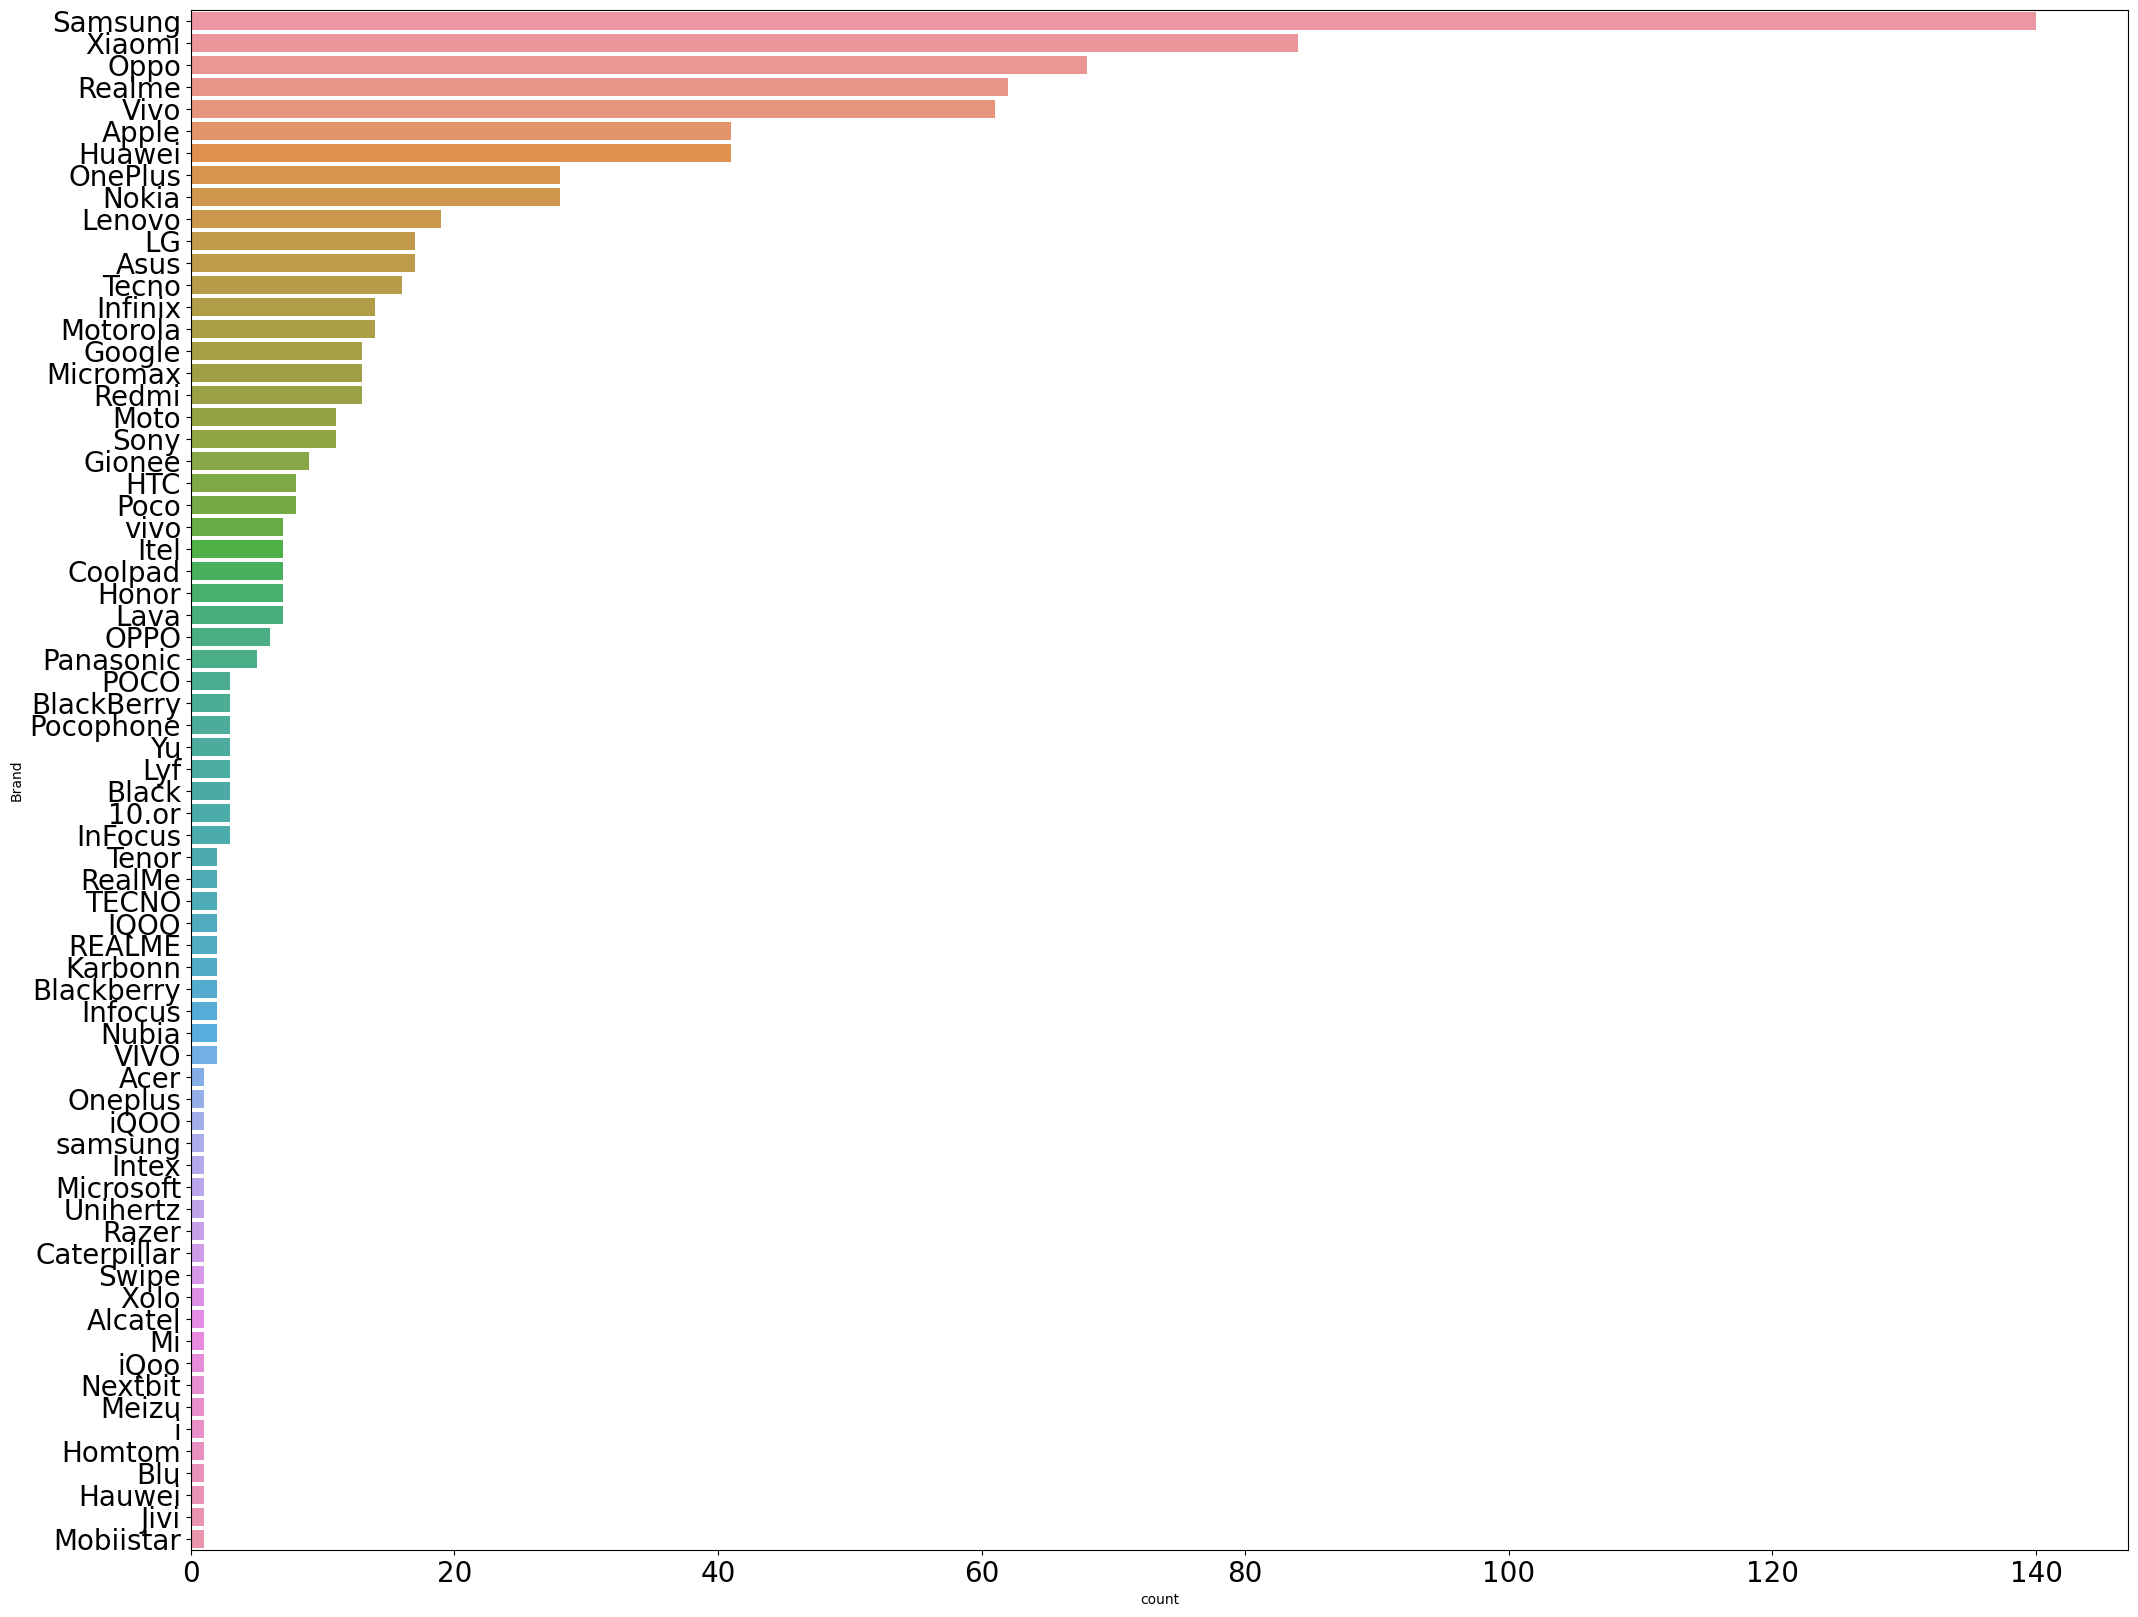

In [18]:
# Calculate the counts of each brand and sort them in descending order
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)

# Create a countplot with sorted order
plt.figure(figsize=(25, 20))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(y='Brand', data=df, order=brand_counts.index)

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Memory (GB)'>

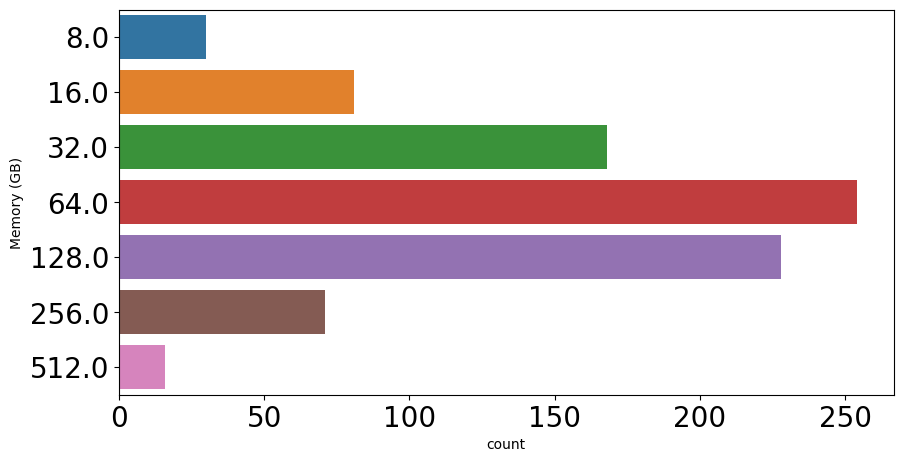

In [19]:
plt.figure(figsize=(10,5))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
sns.countplot(y='Memory (GB)', data=df)

Dari countplot, dapat terlihat bahwa jumlah penyimpanan *smartphone* paling banyak adalah sebesar 64 GB dan 512 GB jumlah penyimpanan paling sedikit.

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Brand', ylabel='RAM (GB)'>

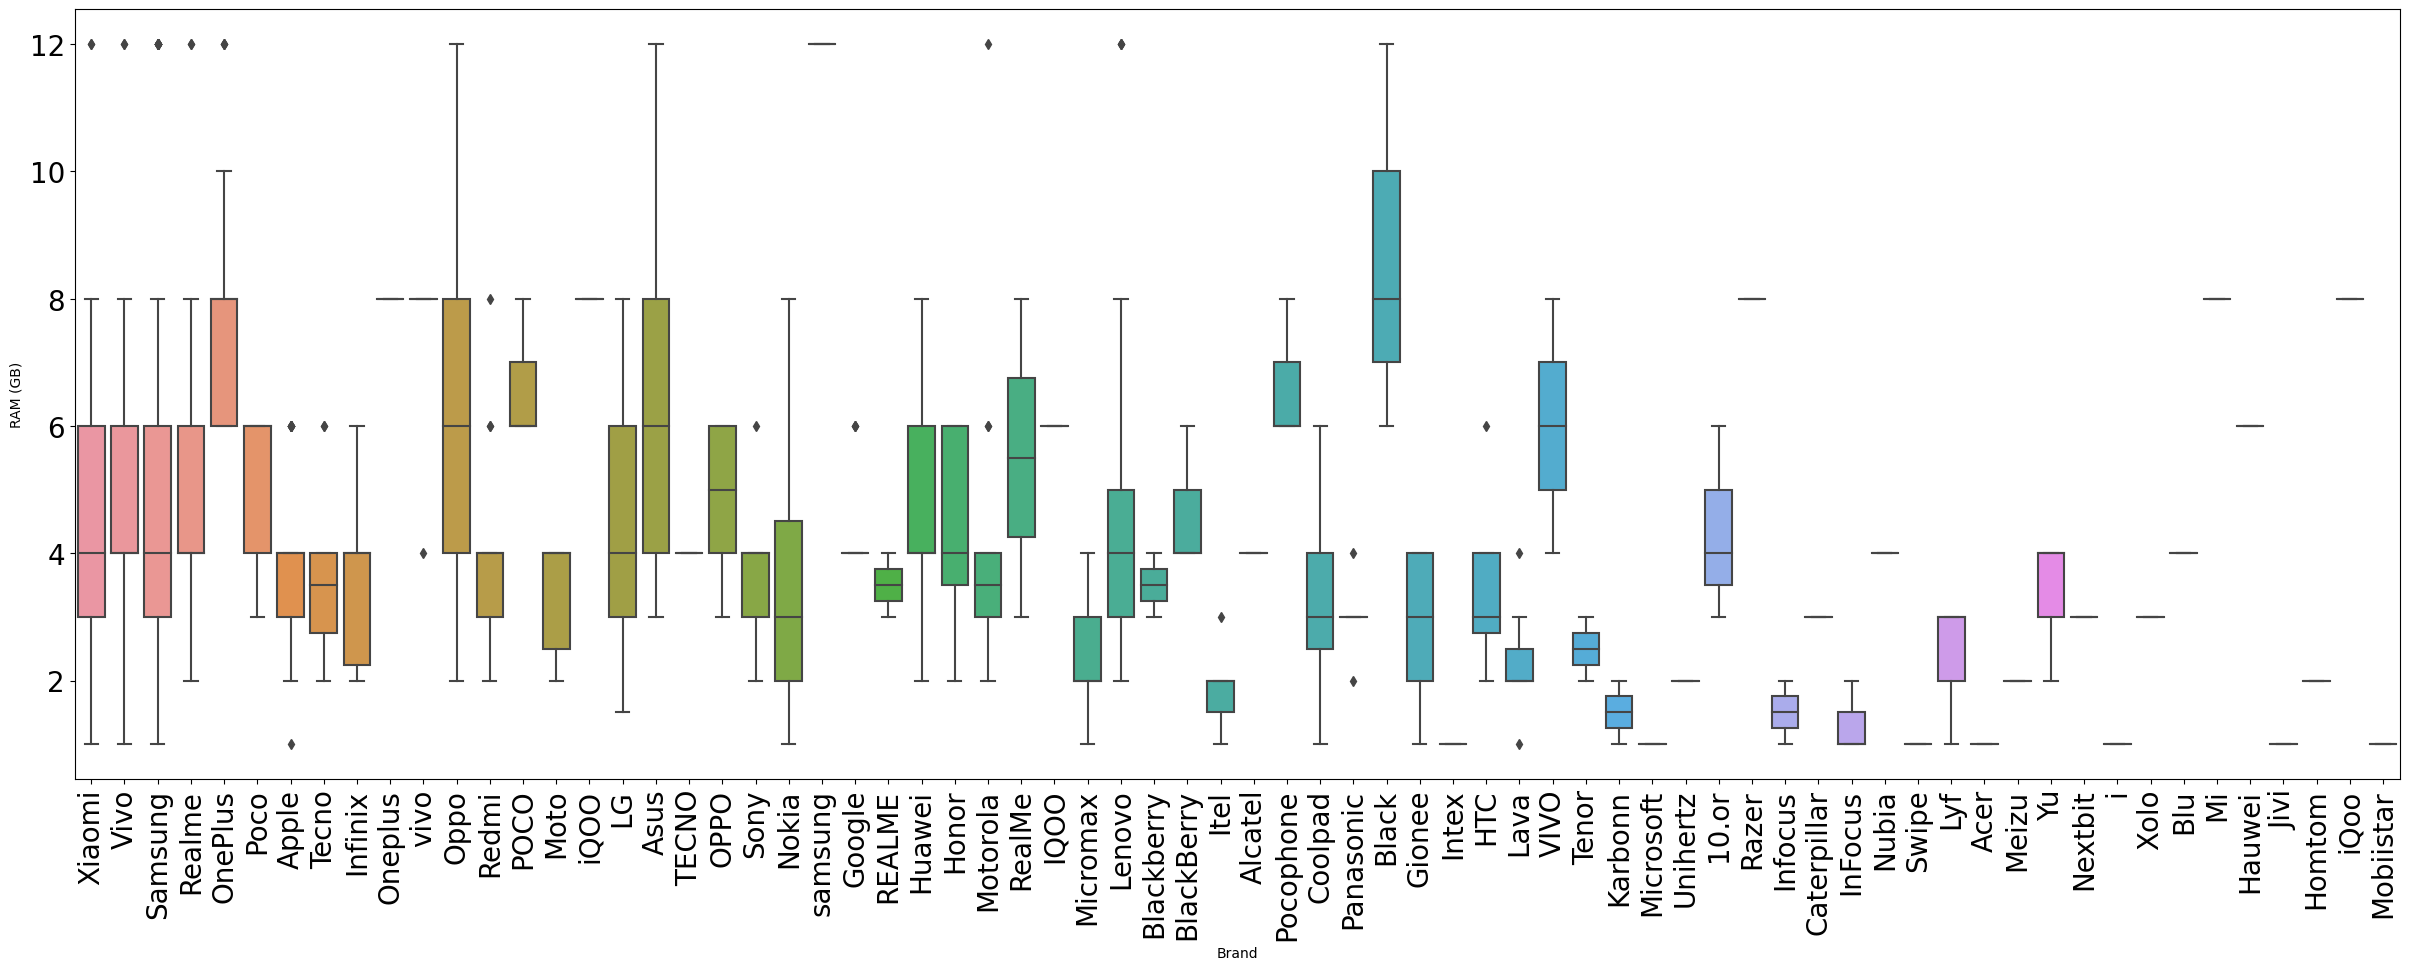

In [20]:
# Menampilkan boxplot Make terhadap RAM (GB)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Brand', y='RAM (GB)')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut <font color='red'>**Memory (GB)**</font>! (hint: harap tambahkan range, Q1, Q2, Q3) ***[revised]***

In [21]:
# Jawab
memoryArr = df['Memory (GB)']

memoryStats = [
    ['Mean', np.mean(memoryArr)],
    ['Median', np.median(memoryArr)],
    ['Mode', scp.mode(memoryArr)[0]],
    ['Standard Deviation', np.std(memoryArr)],
    ['Variance', np.var(memoryArr)],
    ['Minimum', np.min(memoryArr)],
    ['Maximum', np.max(memoryArr)],
    ['Range', (np.max(memoryArr) - np.min(memoryArr))],
    ['Q1', np.quantile(memoryArr, 0.25)],
    ['Q2', np.quantile(memoryArr, 0.5)],
    ['Q3', np.quantile(memoryArr, 0.75)],
]

pd.DataFrame(memoryStats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,92.830189
1,Median,64.000000
2,Mode,64.000000
3,Standard Deviation,87.620480
4,Variance,7677.348523
5,Minimum,8.000000
6,Maximum,512.000000
7,Range,504.000000
8,Q1,32.000000
9,Q2,64.000000


(b) Apa central tendency paling cocok untuk atribut <font color='red'>**Memory (GB)**</font>? Berikan alasan! ***[revised]***

Jawab

Perbedaan nilai maksimum dengan nilai mean lebih besar jika dibandingkan dengan perbedaan nilai minimum dengan nilai mean sehingga kemungkinan data cenderung padat di nilai rendah atu padat ke kiri. Maka, central tendency yang paling cocok untuk atribut Memory (GB) dimana bentuk distribusi bersifat right skewed (berat di sebelah kiri) adalah `median` 

(c) Buatlah heatmap dari korelasi Pearson pada dataset `SmartphoneSpecs.csv` dan berikan analisis Anda terhadap heatmap tersebut!

<Axes: >

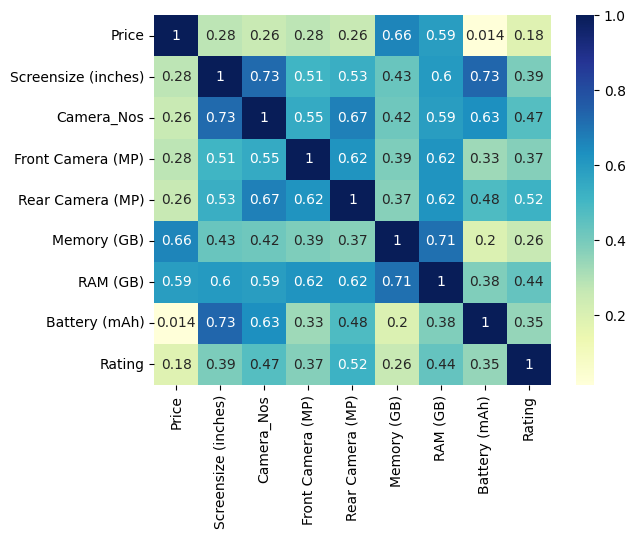

In [22]:
# Jawab
numericColumn = df.select_dtypes(include=[np.number])
selectedColumns = numericColumn.corr(method='pearson')
sns.heatmap(selectedColumns, cmap="YlGnBu", annot=True )

Dari heatmap di atas kita dapat mengambil kesimpulan bahwa pasangan atribut screensize dengan camera_nos dan screensize dengan battery memiliki relasi paling tinggi jika dibandikan yang lainnya. Sementara itu pasangan atribut price dengan battery memiliki relasi yang paling rendah.

Dari nilai-nilai relasi tersebut juga dapat diklasifikasikan bahwa nilai yang berada di atas 0.7 sebagai nilai relasi yang dapat dikatakan cukup tinggi jika dibandingkan dengan yang lainnya, sedangkan untuk nilai yang berada di bawah 0.2 dapat diklasifikasikan sebagai nilai relasi yang cukup rendah jika dibandingkan yang lainnya.

### **SOAL 2: Data Visualization**

Untuk menjawab soal-soal berikut, pilihlah salah satu dari visualisasi di bawah ini yang merupakan visualisasi yang tepat untuk menjawab pertanyaan tersebut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE Plot

Pada beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan pada soal tersebut.

**Harap tuliskan secara eksplisit chart apa yang Anda pilih beserta alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata ukuran Megapiksel dari kamera belakang yang dimiliki dari setiap merk *smartphone*. Apakah merek Sony memiliki ukuran Megapiksel dari kamera belakang terbesar?

      Brand  Rear Camera (MP)
0     10.or         14.000000
1      Acer          5.000000
2   Alcatel         16.000000
3     Apple         11.902439
4      Asus         28.411765
..      ...               ...
65        i          5.000000
66     iQOO         48.000000
67     iQoo         48.000000
68  samsung         12.000000
69     vivo         42.857143

[70 rows x 2 columns]


d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


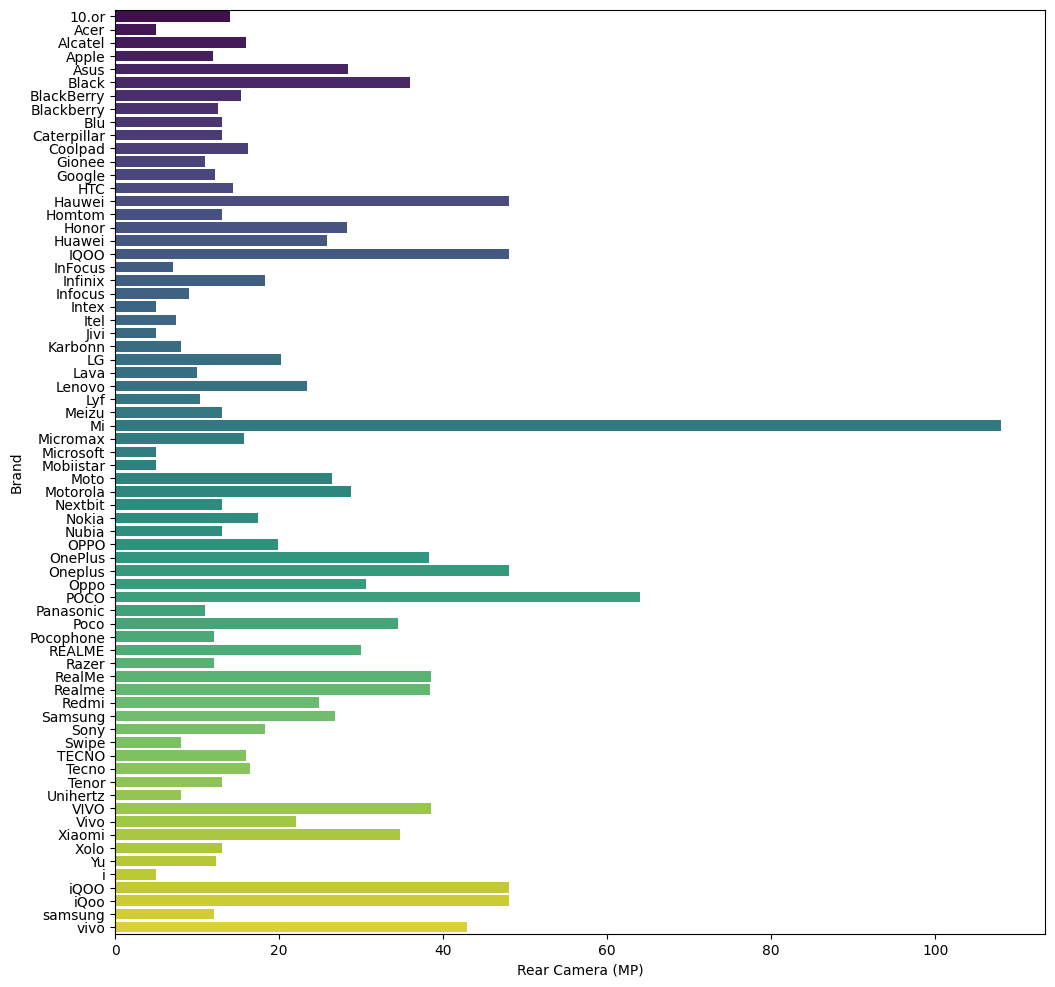

In [23]:
meanDf = df.groupby('Brand')['Rear Camera (MP)'].mean().reset_index()
print(meanDf)
plt.figure(figsize=(12, 12))
sns.barplot(x='Rear Camera (MP)', y='Brand', data=meanDf, palette='viridis')
plt.show()

Jawab

chart yang salah pilih adalah bar chart. Hal tersebut dikarenakan saya ingin melakukan perbandingan antar brand yang ada melalui nilai rata-rata yang didapatkan. Dengan menggunakan bar chart hal tersebut dapat dilakukan dengan mudah yaitu dengan melihat tinggi dari bar yang merepresentasikan nilai rata-rata dari masing-masing brand 

Untuk menjawab pertanyaan di atas, bukan brand Sony yang memiliki ukuran megapixel kamera belakang terbesar,  melainkan brand Mi yang memiliki ukuran megapixel kamera belakang terbesar 

(b) Buatlah visualisasi data persentase *smartphone* yang memiliki ukuran RAM yang lebih dari 6 GB. Dari hasil visualisasi tersebut berapakah persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB?

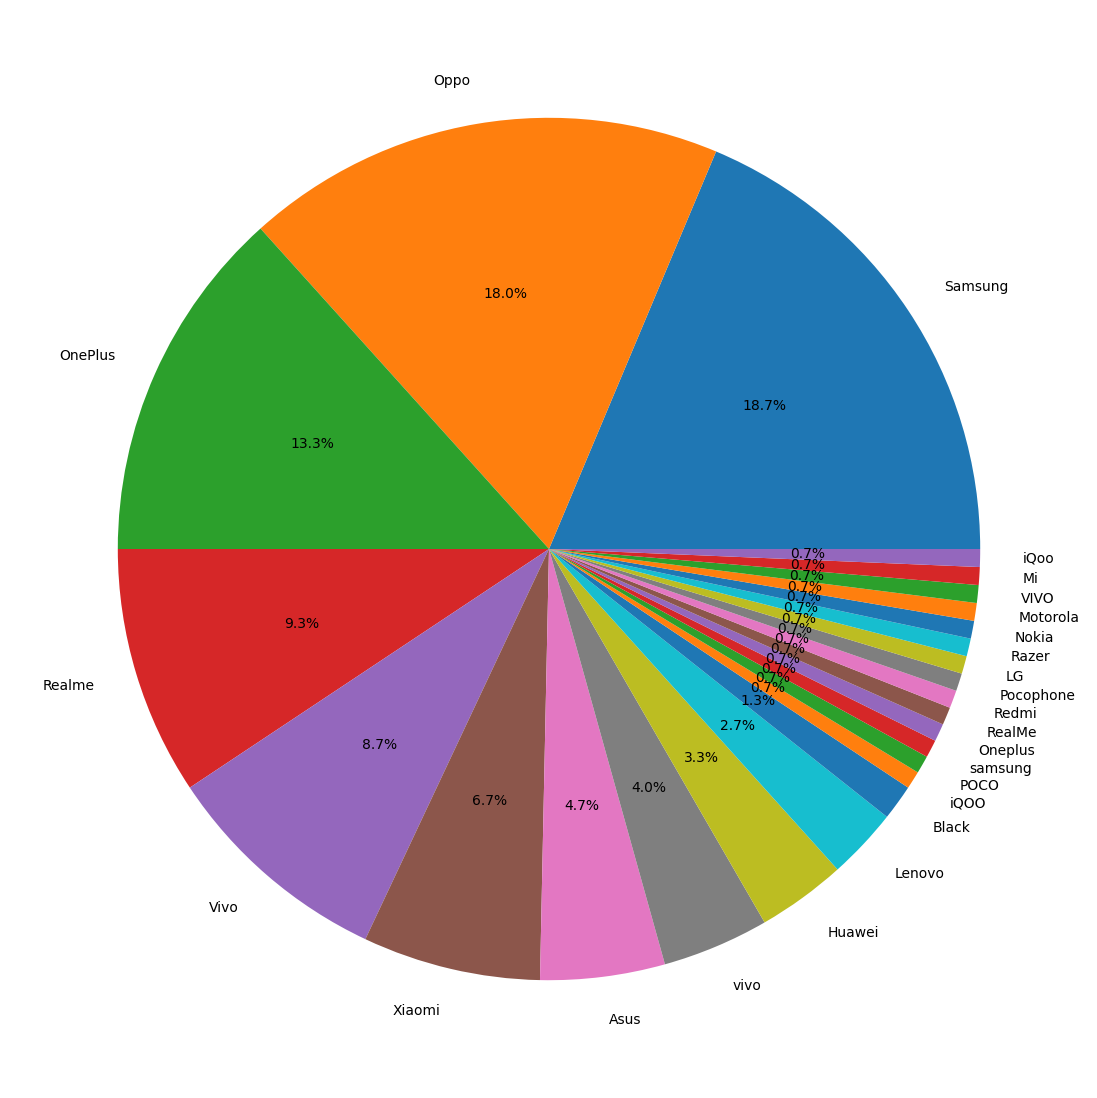

In [24]:
# Jawab
moreThan6GB = df[df['RAM (GB)'] > 6]
brandSum = moreThan6GB['Brand'].value_counts()
plt.figure(figsize=(14, 14))
plt.pie(brandSum, labels=brandSum.index, autopct='%1.1f%%')
rateMore3 = moreThan6GB[moreThan6GB['Rating']==3]

Visualisasi data di atas saya menggunakan pie chart karena menurut saya pie chart merupakan chart yang tepat untuk menunjukkan data persentase dimana penggambaran perbandingan dengan seluruh data yang ada dapat langsung dilihat.

In [25]:
# jumlah smartphone dengan nilai rating 3 dan RAM yang lebih dari 6 GB
rating3ram6 = moreThan6GB[moreThan6GB['Rating'] == 3]
rating3ram6SumData = len(rating3ram6)
# jumlah smartphone dengan RAM lebih dari 6 GB
moreThan6GBSumData = len(moreThan6GB)
# persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB
percentage = (rating3ram6SumData/moreThan6GBSumData)*100
print("persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB adalah {}%".format(percentage))

persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB adalah 12.0%


(c) Buatlah visualisasi untuk melihat apakah terdapat outliers di atribut `Camera_Nos` untuk setiap besaran RAM. Berikan satu contoh RAM yang terlihat memiliki outlier dan berikan alasannya!

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='RAM (GB)', ylabel='Camera_Nos'>

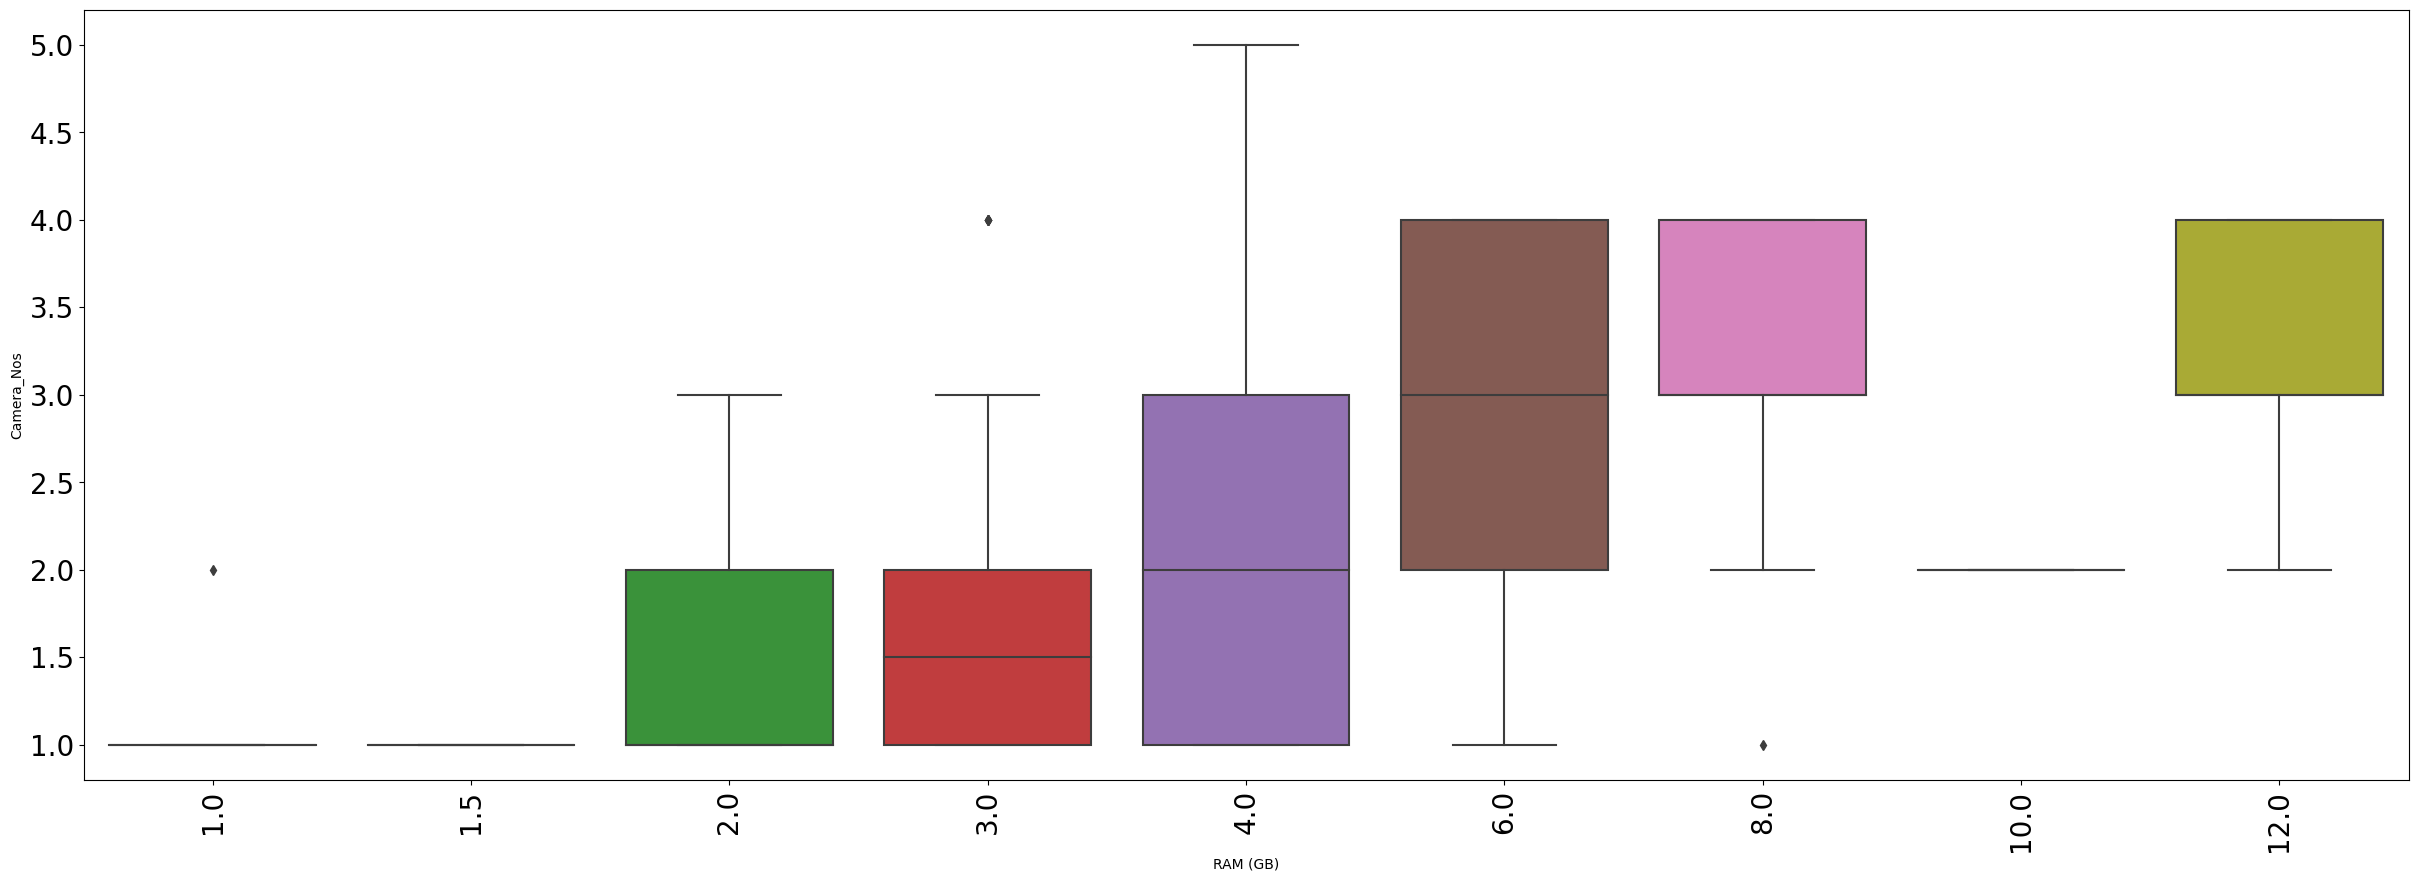

In [26]:
# Jawab
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='RAM (GB)', y='Camera_Nos')

Visualisasi data di atas menggunakan box plot karena visualisasi data yang disediakan oleh box plot cukup jelas membedakan pendistribusian data set dan eksistensi dari outliers. Jika dilihat pada gambar di atas, maka kita dapat dengan mudah mengidentifikasi adanya outlier yang dilambangkan sebuah dot hitam di masing-masing kolom (jika ada).

Salah satu contoh ram yang memiliki outlier adalah apple dimana range maksimum persebaran data hanya sampai di value atribut Camera_Nos senilai 3.0 sedangkan ternyata terdapat sejumlah kecil (dibandingkan dengan jumlah keseluruhan data) data yang memiliki nilai atribut Camera_Nos yang berbeda dengan cukup signifikan, yaitu senilai 4.0. Maka nilai yang berbeda cukup signifikan tersebut digambarkan sebagai sebuah outlier

(d) Buatlah visualisasi untuk melihat pola atau pattern antara Battery (mAh) dan Screensize (inches). **Menurut Anda, apa hubungan yang dimiliki antara Battery dan Screensize ? Jelaskan!**

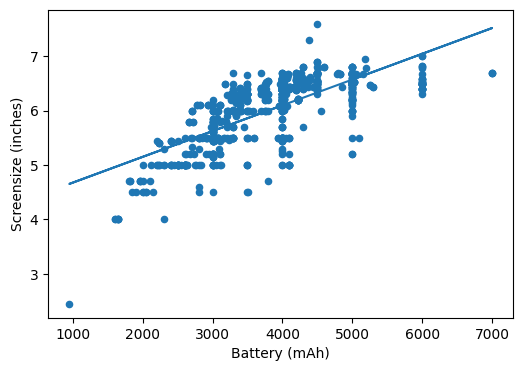

In [27]:
# Jawab
battery = df['Battery (mAh)']
screensize = df['Screensize (inches)']
df.plot.scatter(x='Battery (mAh)', y='Screensize (inches)', figsize=(6,4))
a, c = polyfit(battery, screensize, 1)
plt.plot(battery, a + c * battery, '-')
plt.show()

Untuk visualisasi data di atas saya menggunakan scatter plot karena scatter menjadi salah satu chart yang paling cocok untuk memvisualisasikan hubungan antar dua variabel seperti mengidentifikasi pola yang mungkin terbentuk. 

Dari hasil scatter plot di atas kita dapat melihat bahwa pesebaran data point menunjukkan adanya korelasi positif antara battery dan juga screensize. Hal tersebut menandakan semakin besar daya baterai maka cenderung semakin besar juga screensize yang dimiliki.

(e) Visualisasikan distribusi data `Memory (GB)` pada Samsung dan Infinix. **Berikan analisis Anda!**

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

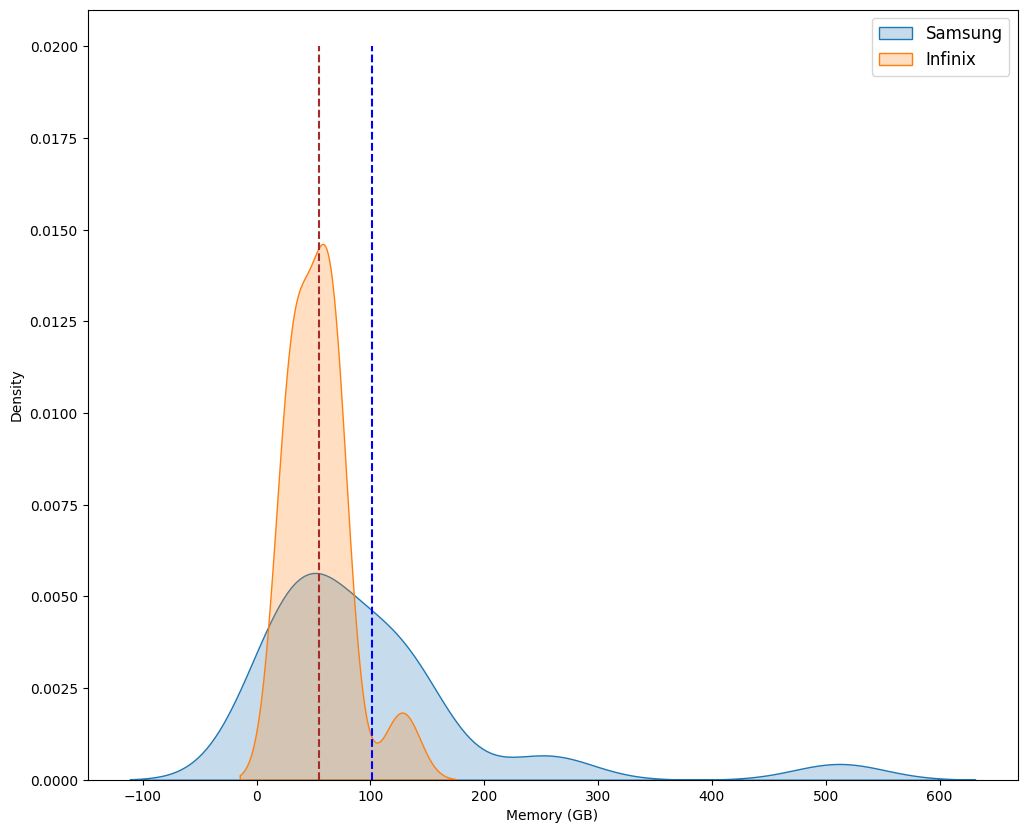

In [28]:
# Jawab
samsungMemory = df[df['Brand'] == 'Samsung']
infinixMemory = df[df['Brand'] == 'Infinix']
plt.figure(figsize=(12,10))
sns.kdeplot(samsungMemory['Memory (GB)'], fill=True)
sns.kdeplot(infinixMemory['Memory (GB)'], fill=True)
plt.legend(['Samsung','Infinix'], fontsize=12)
plt.vlines(x=samsungMemory['Memory (GB)'].mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=infinixMemory['Memory (GB)'].mean(), ymin=0, ymax=0.02, color='brown', linestyle='--')
plt.show()

Untuk visualisasi data di atas saya menggunakan visualisasi overlapping KDE plot karena kita ingin membandingkan distribusi data dari antara kedua hal, dalam kasus ini Memory dari brand Samsung dan Infinix.

Dari hasil gambaran di atas kita dapat mengidentifikasi sejumlah bagian overlappig yang cukup banyak. Hal tersebut menandakan bahwa sebagian dari smartphone dengan brand Samsung memiliki kapasistas memory yang sama besar dengan smartphone dengan brand Infinix. Selain itu, dikarenaka kedua brand memiliki bentuk visualisasi data yang right skewed, maka dapat disimpulkan bahwa lebih banyak smartphone dengan memory besar yang diproduksi oleh kedua brand.

(f) Buatlah visualisasi untuk menentukan merek *smartphone* yang memiliki kapasitas penyimpanan kurang dari 64 GB dan memiliki rating 1 dengan harga rata-rata terendah (paling murah). Apa yang membuat produk pada merek *smartphone* tersebut memiliki harga termurah? `hint: Gunakan Descriptive Statistics`

d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\KULIAH\kasdad\lab2\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


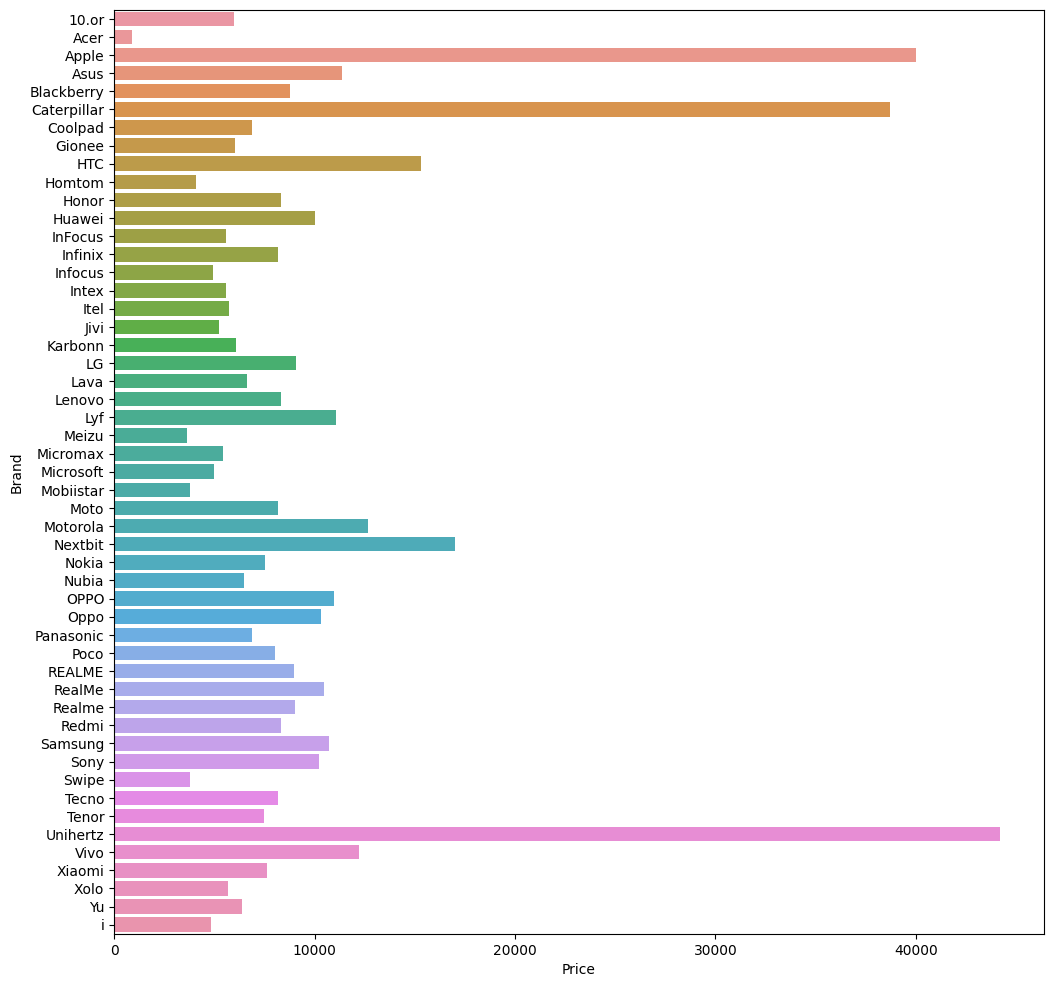

In [29]:
# Jawab
lessThan6GB = df[df['Memory (GB)'] < 64]
withRating1 = lessThan6GB[lessThan6GB['Rating'] == 1]
meanWanted = withRating1.groupby('Brand')['Price'].mean().reset_index()
plt.figure(figsize=(12, 12))
sns.barplot(x='Price', y='Brand', data=meanWanted)
plt.show()

Visualisasi di atas saya menggunakan bar chart karena saya ingin melakukan perbandingan dari rata-rata harga smartphone dengan spesifikasi yang sudah disebutkan. Dengan menggunakan bar chart kita dapat dengan mudah melakukan perbandingan karena bentuk representasi data yang berbentuk bar sehingga kita hanya perlu mengamati mana yang lebih tinggi atau mana yang lebih rendah dari segi rata-rata harga

In [30]:
df[(df['Brand'] == 'Acer') & (df['Rating'] == 1) & (df['Memory (GB)'] < 64)]

,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
746,Acer,Acer Liquid Z6E,905,5.0,1,2.0,5.0,8.0,1.0,2000.0,1


Brand smartphone yang memiliki harga termurah adalah brand Acer. Hal tersebut dikarenakan harga smartphone yang dimiliki oleh brand tersebut sangat murah. Meskipun jika ditinjau brand lain memiliki jumlah produksi smartphone yang lebih besar sehingga nilai rata-rata harga brand tersebut turun, namun nilai harga dari smartphone yang mereka miliki relatif jauh lebih besar dibandingkan dengan smarpthone brand Acer. Oleh karena itu, maka brand Acer memiliki harga rata-rata paling rendah.